In [1]:
# Wide style
from ipython_tools import handler
handler.style()

# load the needed python and basf2 libraries
import glob
from array import array
import sys
import math
import numpy
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.patches as patches

from matplotlib.pyplot import *

In [2]:
matplotlib.rcParams.update({'font.size': 22,})

In [3]:
import tensorflow as tf
import zfit
from zfit import z
from zfit.pdf import DoubleCB

In [4]:
print("Tensor flow version",tf.__version__)
print("zfit version",zfit.__version__) 

Tensor flow version 2.2.0
zfit version 0.5.2


In [7]:
obs     = zfit.Space("all", limits=(8.5, 9.8))

In [8]:
mu = zfit.Parameter("mu", 9.46,9.36,9.56)
sigma  = zfit.Parameter("sigma", 0.03)
alphal  = zfit.Parameter("alphal", 1.5,0.5,2.)
nl  = zfit.Parameter("nl", 35.,25.,45.)
alphar  = zfit.Parameter("alphar", 1.,0.5,2.)
nr  = zfit.Parameter("nr", 1.,0.5,2.)

In [9]:
DBCB = DoubleCB(obs=obs, mu=mu, sigma=sigma,alphal=alphal,alphar=alphar,nl=nl,nr=nr)

In [10]:
x = np.linspace(8.5, 9.8, 1000)
y = DBCB.pdf(x,norm_range=(8.5,9.8)).numpy()

/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The function <function Space.limits at 0x7f9782125e18> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('all',), axes=None, limits=(array([[8.5]]), array([[9.8]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  This is separate from the ipykernel package so we can avoid doing imports until


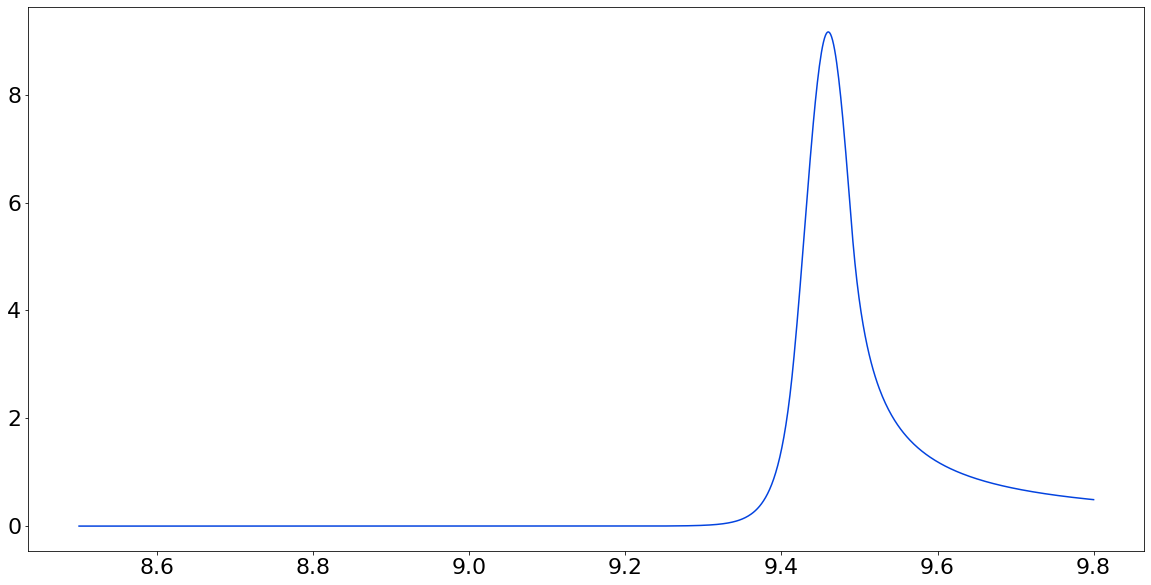

In [11]:
figure(figsize=(20,10))

lower, upper = obs.limits
#counts, bin_edges = np.histogram(dfCutDic['signal'].gamma_mRecoil, 80, range=(lower[-1][0], upper[0][0]))
#bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
#err = np.sqrt(counts)
#errorbar(bin_centres, counts, yerr=err, fmt='o', color='xkcd:black')

x_plot = np.linspace(lower[-1][0], upper[0][0], num=1000)
y_plot = zfit.run(DBCB.pdf(x_plot, norm_range=obs))

plot(x_plot, y_plot, color='xkcd:blue')


In [12]:
c00 = zfit.Parameter("c00", 1)#, 0, 100)
c01 = zfit.Parameter("c01", 0.4)#, 0, 100)
c02 = zfit.Parameter("c02", 0.1)#, 0, 100)
c03 = zfit.Parameter("c03", 0.1)#, 0, 100)

In [13]:
polynom = zfit.pdf.Chebyshev(obs=obs, coeffs=[c00, c01, c02, c03])

In [14]:
#polynom = zfit.pdf.Legendre(obs=obs, coeffs=[c00, c01, c02, c03])

In [15]:
lambd = zfit.Parameter("lambda", 1., 0., 2.)
exponential = zfit.pdf.Exponential(lambd, obs=obs)

In [16]:
lambd.set_value(1.5)

/home/belle2/gpinna/.local/lib/python3.6/site-packages/zfit/models/polynomials.py:27: UserWarning: The function <function Space.limit1d at 0x7f978212c488> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('all',), axes=(0,), limits=(array([[8.5]]), array([[9.8]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  lim_low, lim_high = limits.limit1d
W0703 14:58:32.612726 140293776963328 def_function.py:598] 5 out of the last 5 calls to <function chebyshev_recurrence at 0x7f9781df1730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_o

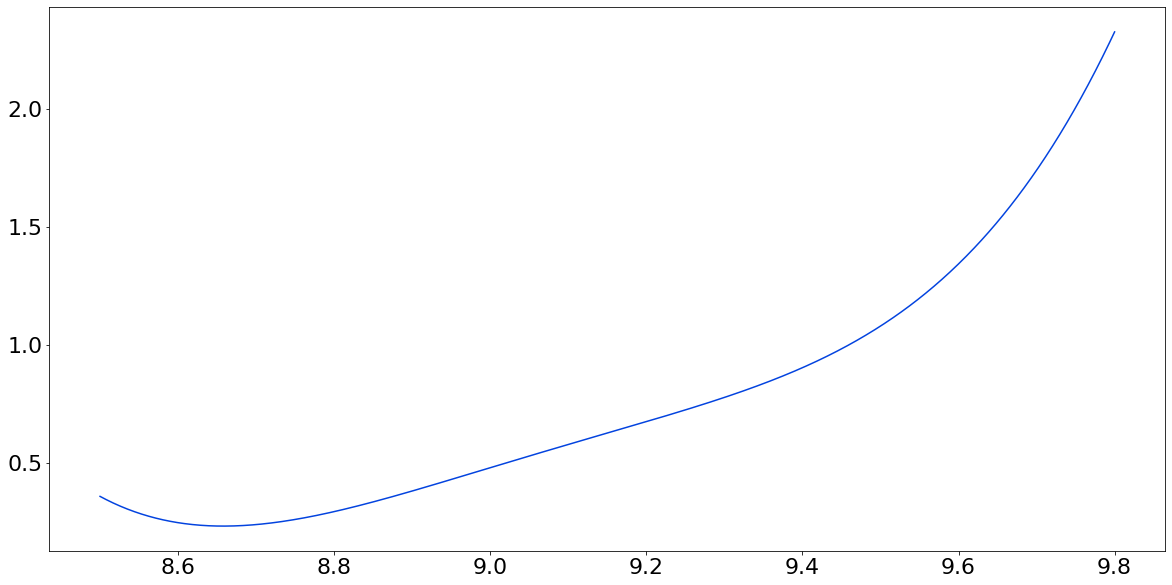

In [17]:
figure(figsize=(20,10))
lower, upper = obs.limits


x_plot = np.linspace(lower[-1][0], upper[0][0], num=1000)
y_plot = zfit.run(polynom.pdf(x_plot, norm_range=obs))

plot(x_plot, y_plot, color='xkcd:blue')

In [18]:
frac = zfit.Parameter("fraction", 0.3, 0, 1)

In [19]:
model = zfit.pdf.SumPDF([DBCB, polynom],fracs=frac)

In [20]:
model.pdf(1)

W0703 14:58:38.388248 140293776963328 def_function.py:598] 7 out of the last 11 calls to <function chebyshev_recurrence at 0x7f9781df1730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.
W0703 14:58:38.401746 140293776963328 def_function.py:598] 7 out of the last 11 calls to <function chebyshev_recurrence at 0x7f9781df1730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary

ValueError: Shapes (1,) and () are not compatible

In [21]:
Nbkg= 1000
Nsig = 100
#n_bkg = sum(weightList)
print("nbkg",Nbkg,"nsig",Nsig)

n_sig = zfit.Parameter('n_sig', Nsig)
n_bkg = zfit.Parameter('n_bkg', Nbkg)

nbkg 1000 nsig 100


In [22]:
n_sig.set_value(Nsig)
n_bkg.set_value(Nbkg)

In [23]:
exponential_extended = exponential.create_extended(n_bkg)

In [24]:
polynom_extended = polynom.create_extended(n_bkg)

In [25]:
DBCB_extended = DBCB.create_extended(n_sig)

In [26]:
#model = zfit.pdf.SumPDF([DBCB_extended, polynom_extended])
model_ext = zfit.pdf.SumPDF([DBCB_extended, exponential_extended])

In [27]:
model_ext.pdf(1)

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.94213688e-06])>

In [28]:
model_ext = zfit.pdf.SumPDF([DBCB_extended, polynom_extended])
model_ext.pdf(1)

ValueError: Shapes (1,) and () are not compatible